In [2]:
import numpy as np
%matplotlib inline
from pylab import *

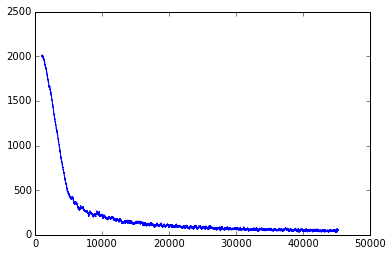

In [59]:
nX00 = nY00 = 1000
nX10 = nY10 = 2000
#nZ00 = 1000   das muss doch null sein oder? müsste also 0 sein
#nZ10 = 1000   und das hier auch, weil das immer gleich weggenommen wird

gamma0 = 5000
gamma1 = 50
gamma2 = 5 * 10**(-5)
gamma3 = 5
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

n0 = np.array([nX00, nX10, nY00, nY10])

nu0 = np.array([0, 0, +1, 0])
nu1 = np.array([0, 0, 0, +1])
nu2 = np.array([0, 0, +1, -1])
nu3 = np.array([0, 0, -1, 0])
nu = [nu0, nu1, nu2, nu3]
t_max = 1000 #t_max soll doch 14s sein ...

def calculate_r(n, gamma):
    r0 = gamma[0]
    r1 = gamma[1] * n[2]
    r2 = gamma[2] * n[2] * ((n[2]-1)/2) * n[3]
    r3 = gamma[3] * n[2]
    r = [r0, r1, r2, r3]
    return r # irgendwas funktioniert nicht so ganz mit der Funktion...

#def my_cumsum(r, r_tot, x):
#    my_sum = 0
#    for i in range(0, 4):
#        my_sum = r[i] + my_sum
#        print(i)
#        if (my_sum - r[i])/r_tot < x and x <= my_sum/r_tot:
#            return i

def reaction(n0, nu, gamma, t_max):
    t = 0
    n = n0

    for i in range(0, 10**5): # das i nutzt du doch auch nicht oder überseh ich was?
        r = calculate_r(n, gamma)
        r_tot = sum(r)
        if r_tot==0:  # ich würde vermuten, dass hier der Fehler ist; r_tot wird nie 0, weil ja immer x_0 und x_1 da sind; r_tot ist immer min. 5000, oder?
            break
        dt = np.random.uniform()
        dt = (1/r_tot) * np.log(1/dt)
        t = t + dt
        #x = np.random.uniform()
        #n = n + nu[my_cumsum(r, r_tot, x)]
        i = np.random.uniform()
        i = np.argmax(i<np.cumsum(r)/r_tot)
        n = n + nu[i]
        #print(i)
        yield t, n
 
t, n = zip(*list(reaction(n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
#xlim((0.06,0.14))
#ylim((1300, 1500))
plot(n[2], n[3], label="Simulation $y_0$")

In [52]:
np.random.uniform?